In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the dataset from the uploaded Excel file
file_path = 'Online Retail.xlsx'
data = pd.read_excel(file_path)

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
data.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [7]:
# Attempting to load only a portion of the data to inspect its structure without overwhelming the system
data_sample = pd.read_excel(file_path, nrows=100)  # Load only the first 100 rows

# Display the first few rows of the dataframe and its info
data_sample.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [8]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    100 non-null    int64         
 1   StockCode    100 non-null    object        
 2   Description  100 non-null    object        
 3   Quantity     100 non-null    int64         
 4   InvoiceDate  100 non-null    datetime64[ns]
 5   UnitPrice    100 non-null    float64       
 6   CustomerID   100 non-null    int64         
 7   Country      100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 6.4+ KB


In [9]:
# Checking for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# Checking for duplicate rows
data.duplicated().sum()

5268

In [11]:
# Creating a new column for total transaction value
data['TotalValue'] = data['Quantity'] * data['UnitPrice']

In [12]:
# Extracting year, month, day from the InvoiceDate
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day

In [13]:
# Preprocessing Steps Implementation

# Step 1: Check for missing values
missing_values = data_sample.isnull().sum()

# Step 2: Check for duplicate entries
duplicate_entries = data_sample.duplicated().sum()

# Step 3: Feature Engineering - Adding a TotalValue column
data_sample['TotalValue'] = data_sample['Quantity'] * data_sample['UnitPrice']

# Step 4: Data Transformation - Extracting year, month, and day from InvoiceDate
data_sample['Year'] = data_sample['InvoiceDate'].dt.year
data_sample['Month'] = data_sample['InvoiceDate'].dt.month
data_sample['Day'] = data_sample['InvoiceDate'].dt.day

# Displaying the results of the checks and a few rows of the updated dataframe
missing_values, duplicate_entries, data_sample[['InvoiceNo', 'TotalValue', 'Year', 'Month', 'Day']].head()

(InvoiceNo      0
 StockCode      0
 Description    0
 Quantity       0
 InvoiceDate    0
 UnitPrice      0
 CustomerID     0
 Country        0
 dtype: int64,
 0,
    InvoiceNo  TotalValue  Year  Month  Day
 0     536365       15.30  2010     12    1
 1     536365       20.34  2010     12    1
 2     536365       22.00  2010     12    1
 3     536365       20.34  2010     12    1
 4     536365       20.34  2010     12    1)

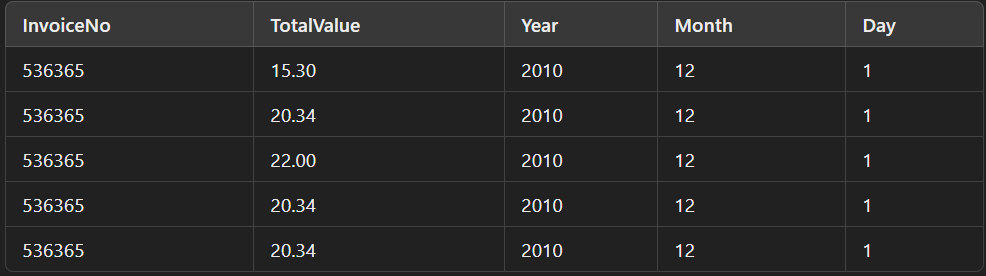

In [14]:
# Save the preprocessed data to a CSV file
preprocessed_file_path = 'Preprocessed_Online_Retail.csv'
data_sample.to_csv(preprocessed_file_path, index=False)
